In [1]:
import pandas as pd
import numpy as np

In [2]:
fpath = "../../data/output/NEON-DOMAINS-HSE.csv"
# fpath = "../../data/output/NEON-DOMAINS-HSE-2020to2023.csv"
hse_df = pd.read_csv(fpath)

In [3]:
print(hse_df.columns)

Index(['domain', 'alpha', 'beta', 'a', 'b', 'alpha_R2', 'alpha_rmse',
       'beta_R2', 'beta_rmse', 'HSE', 'k'],
      dtype='object')


In [4]:
hse_df

,domain,alpha,beta,a,b,alpha_R2,alpha_rmse,beta_R2,beta_rmse,HSE,k
0,D01,2.2529,0.6684,0.2941,1.9426,0.8507,0.6235,0.8511,0.2782,1.7394,0.4662
1,D02,2.2898,0.6779,0.3637,1.9245,0.8637,0.6819,0.9117,0.2563,1.6605,0.3985
2,D03,2.1601,0.6945,0.2718,1.4214,0.7379,1.1051,0.6534,0.5407,1.7197,1.3367
3,D04,3.4471,0.3531,0.0488,2.4232,0.5582,1.2368,0.5106,0.2792,3.2176,0.1363
4,D05,2.4682,0.6332,0.1302,2.2676,0.8379,0.7015,0.8523,0.2608,1.6902,0.5786
5,D06,2.8065,0.5706,0.1382,1.8270,0.8751,0.7167,0.7824,0.3114,1.6987,0.8749
6,D07,2.3715,0.6612,0.2218,2.0167,0.8424,0.7519,0.8638,0.2875,1.6532,0.5402
7,D08,2.6293,0.6481,0.1524,2.0092,0.8465,0.8409,0.8781,0.2620,1.4565,0.7618
8,D09,3.0978,0.0681,0.2093,2.0339,0.5748,0.1197,0.3748,0.0355,27.2876,0.0000
9,D10,1.8420,0.6368,0.2951,1.4466,0.5332,0.8107,0.7382,0.2792,2.2985,1.0629


In [5]:
## Creaete a new df and save
out_df = hse_df.copy()


In [6]:
alpha_list = []
beta_list = []
for i in range(len(out_df)):
    col_str = f"{out_df['alpha'].values[i].round(3).astype(str)} ({out_df['alpha_rmse'].values[i].round(2).astype(str)}, {out_df['alpha_R2'].values[i].round(2).astype(str)})"
    alpha_list.append(col_str)

    col_str = f"{out_df['beta'].values[i].round(3).astype(str)} ({out_df['beta_rmse'].values[i].round(2).astype(str)}, {out_df['beta_R2'].values[i].round(2).astype(str)})"
    beta_list.append(col_str)
    
out_df['alpha'] = alpha_list
out_df['beta'] = beta_list


In [7]:
# outfp = "../../data/output/NEON-DOMAINS-HSE-TEXTFORTABLE.csv"
outfp = "../../data/output/NEON-DOMAINS-HSE-2020to2023-TEXTFORTABLE.csv"
out_df.to_csv(outfp)

In [ ]:
###########
###########
###########

In [5]:
# read in fia regression data
fia_results = pd.read_csv("../../data/raw/FIA_HEX_GEDI_BIOMASS_REGRESSIONS_HSE_NEONALLDATA.csv")
# fia_results = pd.read_csv("../../data/raw/FIA_HEX_GEDI_BIOMASS_REGRESSIONS_HSE_1.56.csv")


In [6]:
fia_results.drop(columns=["Unnamed: 0"],inplace=True)

In [7]:
# Get domain ids in proper format
domain_list = []
for i in range(len(fia_results)):
    domain_num_str = int(fia_results['domain'].values[i])
    if domain_num_str<10:
        domain_str = f"D0{domain_num_str}"
    else:
        domain_str = f"D{domain_num_str}"

    domain_list.append(domain_str)
    
fia_results['domain'] = domain_list

In [8]:
merged_df = pd.merge(hse_df, fia_results, on="domain")

In [9]:
merged_df

,domain,alpha,beta,a,b,alpha_R2,alpha_rmse,beta_R2,beta_rmse,HSE,k,slope,intercept,r2,rmse
0,D01,2.2529,0.6684,0.2941,1.9426,0.8507,0.6235,0.8511,0.2782,1.7394,0.4662,0.96,33.07,0.443,27.360
1,D02,2.2898,0.6779,0.3637,1.9245,0.8637,0.6819,0.9117,0.2563,1.6605,0.3985,0.97,30.56,0.298,23.283
2,D03,2.1601,0.6945,0.2718,1.4214,0.7379,1.1051,0.6534,0.5407,1.7197,1.3367,1.14,18.00,0.487,21.357
3,D04,3.4471,0.3531,0.0488,2.4232,0.5582,1.2368,0.5106,0.2792,3.2176,0.1363,2.39,4.49,0.260,16.873
4,D05,2.4682,0.6332,0.1302,2.2676,0.8379,0.7015,0.8523,0.2608,1.6902,0.5786,0.90,25.22,0.198,29.106
5,D06,2.8065,0.5706,0.1382,1.8270,0.8751,0.7167,0.7824,0.3114,1.6987,0.8749,0.82,4.53,0.544,11.016
6,D07,2.3715,0.6612,0.2218,2.0167,0.8424,0.7519,0.8638,0.2875,1.6532,0.5402,1.35,9.13,0.674,24.976
7,D08,2.6293,0.6481,0.1524,2.0092,0.8465,0.8409,0.8781,0.2620,1.4565,0.7618,2.19,14.49,0.542,20.882
8,D09,3.0978,0.0681,0.2093,2.0339,0.5748,0.1197,0.3748,0.0355,27.2876,0.0000,3.02,0.23,0.606,4.897
9,D10,1.8420,0.6368,0.2951,1.4466,0.5332,0.8107,0.7382,0.2792,2.2985,1.0629,0.39,0.66,0.048,2.220


In [25]:
merged_df.to_csv("../../data/output/NEON-HSE-ALLYEARS-WITHGEDIRESULTS.csv", index=False)
# merged_df.to_csv("../../data/output/NEON-HSE-ALLYEARS-WITHGEDIRESULTS_HSE1.56.csv", index=False)

In [ ]:
#######
## PLOTTING
#######

In [10]:
## Linear regression function
from scipy import stats
import numpy as np
from sklearn.metrics import mean_squared_error

def LinReg(x,y):
    """
    returns: regression model
    """
    filterbool = ~(np.isnan(x) | np.isnan(y))
    x = x[filterbool]
    y = y[filterbool]
    # Simple OLS linear regression using scipy stats, which is what statsmodel depends on
    try:
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        rmse = mean_squared_error(y, x*slope+intercept, squared=False)
    except:
        print(f"Not enough data. Length: ", len(x))
        return np.nan, np.nan, np.nan, np.nan, np.nan,np.nan
    # return data
    return slope, intercept, r_value, p_value, std_err, rmse

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid", font_scale=1.35, rc={'grid.color': '#ededed'})

def plot_data(x,y,xlab,ylab,outf):
    
    fig,ax = plt.subplots(1,1,figsize=(8,8))
    slope, intercept, r_value, p_value, std_err, rmse = LinReg(merged_df[x].values,
                                                               merged_df[y].values)

    ax.scatter(merged_df[x],merged_df[y],c="black",s=14)
    ax.plot(merged_df[x],slope*merged_df[x]+intercept,c="red",lw=0.7)
    text = f"y={np.round(slope,3)}*x+{np.round(intercept,3)}\n" + f"RMSE={np.round(rmse,3)}\n" \
    r"$R^{2}$="+str(np.round(r_value**2,3))
    ax.text(.05,.97,text,ha="left",va = "top",
            transform=ax.transAxes)
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    fig.savefig(outf,dpi=300)
    plt.show()

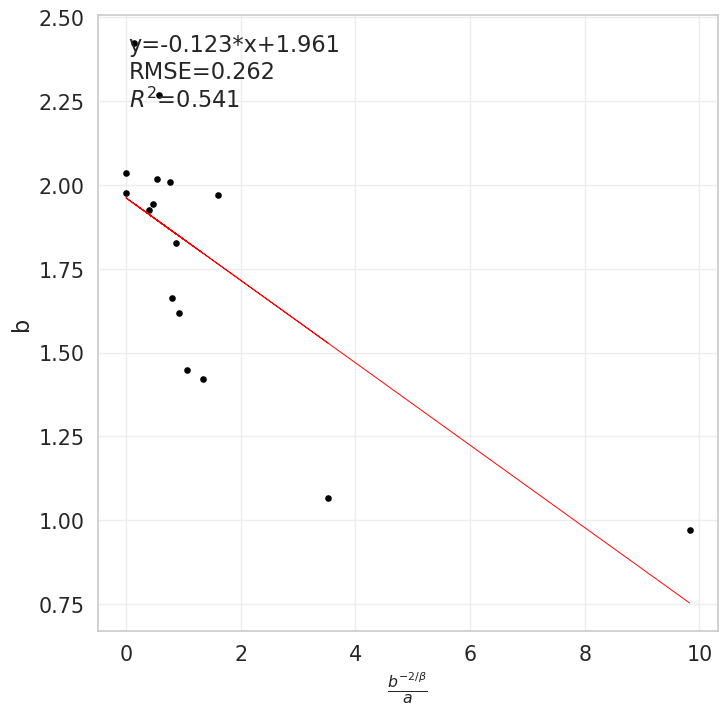

In [12]:
fp = "../../figs/temp/b_k_neonallyears_neonhse.png"
plot_data("k", "b", xlab=r"$\frac{b^{-2/\beta}}{a}$", ylab="b", outf=fp)

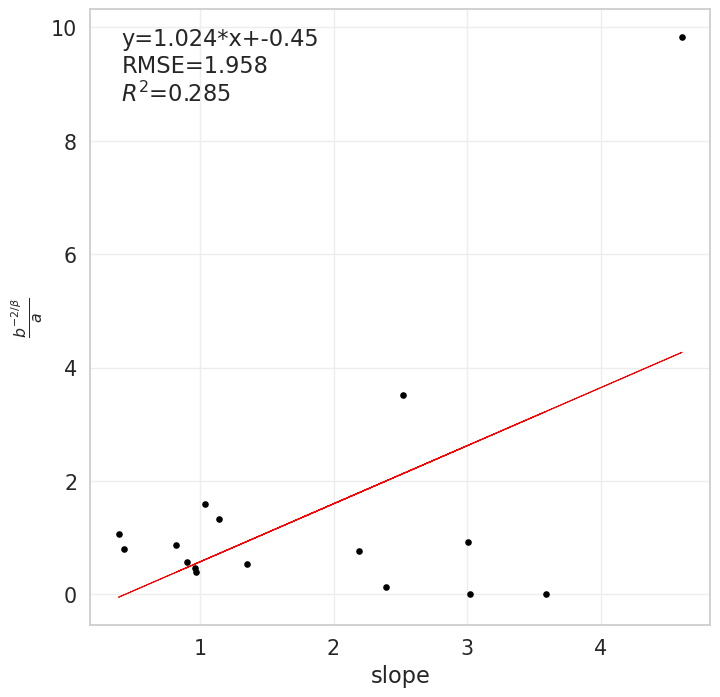

In [13]:
fp = "../../figs/temp/k_gedislope_neonallyears_neonhse.png"
plot_data("slope", "k", xlab="slope", ylab=r"$\frac{b^{-2/\beta}}{a}$",outf=fp)

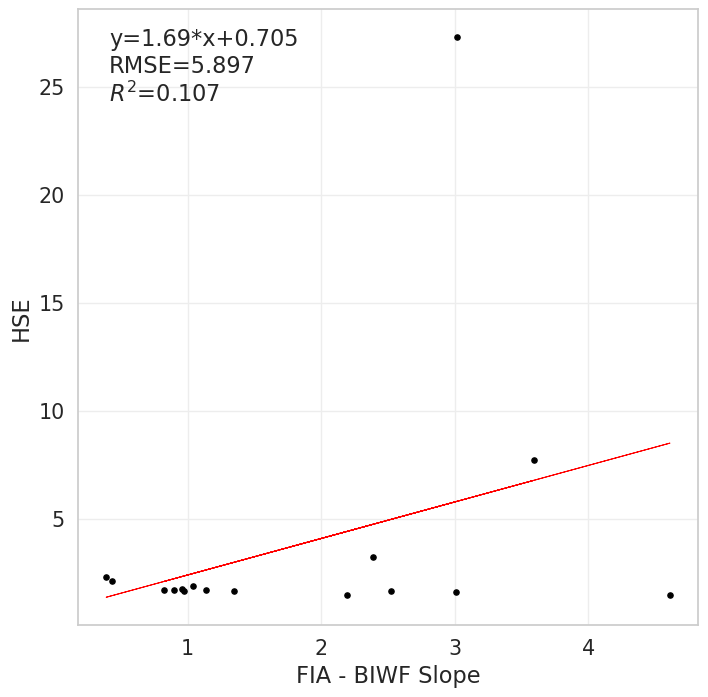

In [14]:
fp = "../../figs/temp/neonhse_gedislope_neonallyears_neonhse.png"
plot_data("slope", "HSE", xlab="FIA - BIWF Slope", ylab="HSE",outf=fp)